In [53]:
import pandas as pd
import numpy as np

data = pd.read_excel('Main_data.xlsx', sheet_name='Dataset')

data

,ids,gender,last_connection,x1,x2,x3,t1,t2
0,1,F,2015-04-27,37.796189,292.189338,85.871732,1102.896732,1814.852022
1,2,M,2015-04-27,44.523437,294.989423,96.432040,1116.845895,1679.957691
2,3,F,2015-02-16,90.593723,298.219531,96.915476,1290.882244,1841.987889
3,4,M,2015-04-18,44.055440,303.041350,96.422230,1173.231390,1712.165400
4,5,F,2015-03-08,9.753165,298.005909,95.192099,1036.007131,1841.026590
...,...,...,...,...,...,...,...,...
9995,9996,F,2015-04-23,80.799213,301.576117,96.079032,1257.325411,1857.092524
9996,9997,M,2015-03-16,96.708871,308.761274,94.555557,1305.579678,1735.045096
9997,9998,M,2015-02-28,74.978155,293.047098,96.981146,1225.027722,1672.188392
9998,9999,M,2015-04-11,57.177898,306.430133,93.671787,1165.217414,1725.720533


In [54]:
# ----------------------- STEP 1 (FIELDS TYPES) -----------------------

female_data = data.loc[data.gender == 'F']
male_data = data.loc[data.gender == 'M']

print('{} - number of male observations\n{} - number of female observations'.format(male_data.shape[0], female_data.shape[0]))

5410 - number of male observations
4590 - number of female observations


In [57]:
#male_r_t1 = np.corrcoef(male_data.x1, male_data.t1)
#female_r_t1 = np.corrcoef(female_data.x1, female_data.t1)

#male_r_t2 = np.corrcoef(male_data.x2, male_data.t2)
#female_r_t2 = np.corrcoef(female_data.x2, female_data.t2)

#print('{} : x1-t1 male correlation\n{} : x1-t1 female correlation\n{} : x2-t2 male correlation\n{} : x2-t2 female correlation'.format(male_r_t1[0, 1], female_r_t1[0, 1], male_r_t2[0, 1], female_r_t2[0, 1]))

#print(np.corrcoef(data.x2, data.t2)[0, 1])

In [58]:
male_data.describe()

,ids,x1,x2,x3,t1,t2
count,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,5017.279852,50.718821,299.940918,94.949963,1176.748215,1699.763671
std,2891.990947,28.975917,9.923072,4.054037,118.462715,39.692289
min,2.000000,0.005516,264.463035,62.029833,897.883743,1557.852139
25%,2527.500000,25.705387,293.225563,92.872321,1086.945206,1672.902252
50%,5022.500000,50.681993,300.004781,95.890824,1180.600579,1700.019126
75%,7513.500000,76.242584,306.450471,97.997855,1265.167967,1725.801883
max,10000.000000,99.882303,338.360548,99.999098,1446.913473,1853.442191


In [59]:
female_data.describe()

,ids,x1,x2,x3,t1,t2
count,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000,4590.000000
mean,4980.722440,49.298835,300.219160,95.180767,1172.633797,1850.986218
std,2881.068061,28.863625,9.848648,13.951933,119.005819,44.318918
min,1.000000,0.004004,264.602451,68.031595,898.016304,1690.711031
25%,2479.500000,23.627329,293.747708,93.094040,1082.289230,1821.864685
50%,4966.500000,48.829976,300.472336,95.889497,1170.499604,1852.125512
75%,7479.750000,74.378609,306.677204,97.993009,1262.870979,1880.047419
max,9996.000000,99.904798,339.416551,1000.000000,1449.617809,2027.374480


In [60]:
data.isnull().sum()

ids                  0
gender               0
last_connection    100
x1                   0
x2                   0
x3                   0
t1                   0
t2                   0
dtype: int64

In [61]:
data.dtypes

ids                         int64
gender                     object
last_connection    datetime64[ns]
x1                        float64
x2                        float64
x3                        float64
t1                        float64
t2                        float64
dtype: object

<AxesSubplot:>

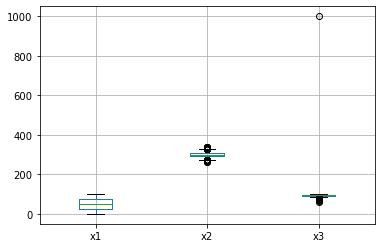

In [62]:
data.boxplot(['x1', 'x2', 'x3'])

<AxesSubplot:>

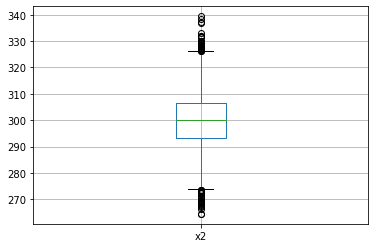

In [63]:
data_2 = data.drop(data[data.x3 == 1000].index)
data_2.boxplot(['x2'])

<AxesSubplot:>

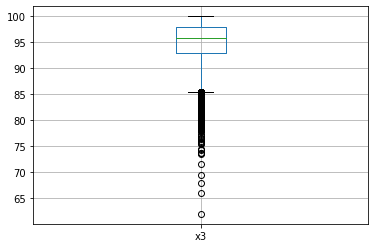

In [64]:
data_2.boxplot(['x3'])

<AxesSubplot:>

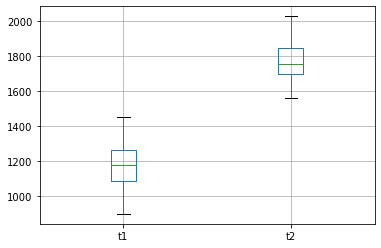

In [65]:
data.boxplot(['t1', 't2'])

In [66]:
for x in ['x2']:
    q_75, q_25 = np.percentile(data.loc[:, x], [75, 25])
    IQR = q_75 - q_25

    max_value = q_75 + (1.5 * IQR)
    min_value = q_25 - (1.5 * IQR)

    data.loc[data[x] < min_value, x] = np.nan
    data.loc[data[x] > max_value, x] = np.nan

In [67]:
for x in ['x3']:
    q_75, q_25 = np.percentile(data.loc[:, x], [75, 25])
    IQR = q_75 - q_25

    max_value = q_75 + (1.5 * IQR)
    min_value = q_25 - (1.5 * IQR)

    data.loc[data[x] < min_value, x] = np.nan
    data.loc[data[x] > max_value, x] = np.nan

In [68]:
data.isnull().sum()

ids                  0
gender               0
last_connection    100
x1                   0
x2                  82
x3                 323
t1                   0
t2                   0
dtype: int64

In [69]:
clear_data = data.dropna()
clear_data.isnull().sum()

ids                0
gender             0
last_connection    0
x1                 0
x2                 0
x3                 0
t1                 0
t2                 0
dtype: int64

In [70]:
clear_data

,ids,gender,last_connection,x1,x2,x3,t1,t2
0,1,F,2015-04-27,37.796189,292.189338,85.871732,1102.896732,1814.852022
1,2,M,2015-04-27,44.523437,294.989423,96.432040,1116.845895,1679.957691
2,3,F,2015-02-16,90.593723,298.219531,96.915476,1290.882244,1841.987889
3,4,M,2015-04-18,44.055440,303.041350,96.422230,1173.231390,1712.165400
4,5,F,2015-03-08,9.753165,298.005909,95.192099,1036.007131,1841.026590
...,...,...,...,...,...,...,...,...
9995,9996,F,2015-04-23,80.799213,301.576117,96.079032,1257.325411,1857.092524
9996,9997,M,2015-03-16,96.708871,308.761274,94.555557,1305.579678,1735.045096
9997,9998,M,2015-02-28,74.978155,293.047098,96.981146,1225.027722,1672.188392
9998,9999,M,2015-04-11,57.177898,306.430133,93.671787,1165.217414,1725.720533


In [71]:
clear_data.describe()

,ids,x1,x2,x3,t1,t2
count,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000
mean,5000.213948,50.146657,300.061119,95.383469,1175.165706,1769.203379
std,2883.459176,28.944061,9.550066,3.323918,118.638738,85.672593
min,1.000000,0.004004,273.944837,85.537649,897.883743,1595.779347
25%,2509.500000,24.717666,293.451353,93.369237,1085.140073,1696.177099
50%,4996.000000,50.055395,300.236033,96.042558,1176.296465,1752.196752
75%,7495.500000,75.532542,306.505021,98.059589,1264.353742,1846.780449
max,10000.000000,99.904798,326.058156,99.999098,1449.617809,1967.261700


In [72]:
data.describe()

,ids,x1,x2,x3,t1,t2
count,10000.00000,10000.000000,9918.000000,9677.000000,10000.000000,10000.000000
mean,5000.50000,50.067047,300.053076,95.386725,1174.859697,1769.174820
std,2886.89568,28.931639,9.559790,3.322583,118.724074,86.214259
min,1.00000,0.004004,273.944837,85.537649,897.883743,1557.852139
25%,2500.75000,24.719006,293.434680,93.373773,1084.746402,1696.077169
50%,5000.50000,49.876050,300.218247,96.047764,1175.567545,1752.607393
75%,7500.25000,75.389142,306.499399,98.061169,1264.322678,1846.609079
max,10000.00000,99.904798,326.143815,99.999098,1449.617809,2027.374480


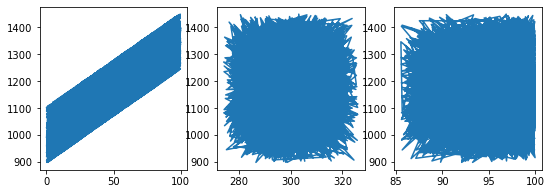

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(clear_data.x1, clear_data.t1)
plt.subplot(132)
plt.plot(clear_data.x2, clear_data.t1)
plt.subplot(133)
plt.plot(clear_data.x3, clear_data.t1)

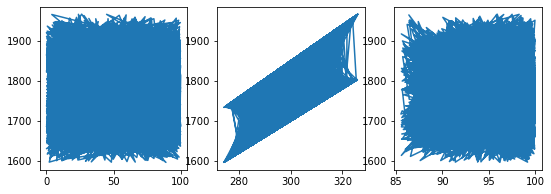

In [74]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.plot(clear_data.x1, clear_data.t2)
plt.subplot(132)
plt.plot(clear_data.x2, clear_data.t2)
plt.subplot(133)
plt.plot(clear_data.x3, clear_data.t2)

In [75]:
clear_r_x2_t2 = np.corrcoef(clear_data.x2, clear_data.t2)
clear_r_x1_t1 = np.corrcoef(clear_data.x1, clear_data.t1)
print('{} : x1 - t1 correlation\n{} : x2 - t2 correlation'.format(clear_r_x1_t1[0,1], clear_r_x2_t2[0, 1]))

0.8602758326644383 : x1 - t1 correlation
0.4874901396140681 : x2 - t2 correlation


In [110]:
# ----------------------- STEP 2 (FINDING CORRELATIONS/MODELING) -----------------------

# -------- X1 - T1 correlation --------

from sklearn.linear_model import LinearRegression

train_x1, train_t1 = clear_data.loc[:8000, 'x1'], clear_data.loc[:8000, 't1']
test_x1, test_t1 = clear_data.loc[8000:, 'x1'], clear_data.loc[8000:, 't1']

In [135]:
regression_1 = LinearRegression()
regression_1.fit(train_x1.to_frame(), train_t1.to_frame())

print('Regression formula: y = {}x + {}'.format(round(regression_1.coef_[0][0], 3), round(regression_1.intercept_[0], 3)))

Regression formula: y = 3.515x + 999.044


In [163]:
prediction_t1 = regression_1.predict(test_x1.to_frame())

compare_data_1 = pd.DataFrame({'Real value': test_t1, 'Predicted value': prediction_t1.flatten()})

percentile_error_1 = round(abs(compare_data_1['Real value'] - compare_data_1['Predicted value']) / compare_data_1['Real value'] * 100, 3)

compare_data_1['Percentile error'] = percentile_error.astype(str) + '%'

compare_data_1

,Real value,Predicted value,Percentile error
8000,1241.078019,1194.107651,3.785%
8001,1066.326735,1033.489427,3.079%
8002,1112.199456,1100.806784,1.024%
8003,1188.122408,1202.719818,1.229%
8004,1023.719536,1019.802472,0.383%
...,...,...,...
9995,1257.325411,1283.074067,2.048%
9996,1305.579678,1339.000554,2.56%
9997,1225.027722,1262.611566,3.068%
9998,1165.217414,1200.039144,2.988%


In [164]:
Indicators_1 = pd.Series([str(round(percentile_error.max(), 3)) + '%', str(round(percentile_error.min(), 3)) + '%', 
                        str(round(percentile_error.mean(), 3)) + '%', str(round(percentile_error.median(), 3)) + '%', 
                        str(round(percentile_error.std(), 3)) + '%'],
                      index = ['Maximum', 'Minimum', 'Mean', 'Median', 'Standard deviation'], name = 'Indicators')

Indicators_1

Maximum               11.571%
Minimum                0.004%
Mean                   4.502%
Median                 4.431%
Standard deviation     2.734%
Name: Indicators, dtype: object

In [160]:
# -------- X2 - T2 correlation --------

train_x2, train_t2 = clear_data.loc[:8000, 'x2'], clear_data.loc[:8000, 't2']
test_x2, test_t2 = clear_data.loc[8000:, 'x2'], clear_data.loc[8000:, 't2']

regression_2 = LinearRegression()
regression_2.fit(train_x2.to_frame(), train_t2.to_frame())

print('Regression formula: y = {}x + {}'.format(round(regression_2.coef_[0][0], 3), round(regression_2.intercept_[0], 3)))

Regression formula: y = 4.409x + 446.548


In [165]:
prediction_t2 = regression_2.predict(test_x2.to_frame())

compare_data_2 = pd.DataFrame({'Real value': test_t2, 'Predicted value': prediction_t2.flatten()})

percentile_error_2 = round(abs(compare_data_2['Real value'] - compare_data_2['Predicted value']) / compare_data_2['Real value'] * 100, 3)

compare_data_2['Percentile error'] = percentile_error_2.astype(str) + '%'

compare_data_2

,Real value,Predicted value,Percentile error
8000,1714.789202,1785.479753,4.122%
8001,1690.454328,1758.658025,4.035%
8002,1819.875598,1739.665503,4.407%
8003,1792.081500,1712.434871,4.444%
8004,1778.869259,1699.490481,4.462%
...,...,...,...
9995,1857.092524,1776.127937,4.36%
9996,1735.045096,1807.805658,4.194%
9997,1672.188392,1738.525437,3.967%
9998,1725.720533,1797.528190,4.161%


In [166]:
Indicators_2 = pd.Series([str(round(percentile_error_2.max(), 3)) + '%', str(round(percentile_error_2.min(), 3)) + '%', 
                        str(round(percentile_error_2.mean(), 3)) + '%', str(round(percentile_error_2.median(), 3)) + '%', 
                        str(round(percentile_error_2.std(), 3)) + '%'],
                      index = ['Maximum', 'Minimum', 'Mean', 'Median', 'Standard deviation'], name = 'Indicators')

Indicators_2

Maximum               4.526%
Minimum                3.67%
Mean                  4.203%
Median                4.248%
Standard deviation    0.187%
Name: Indicators, dtype: object

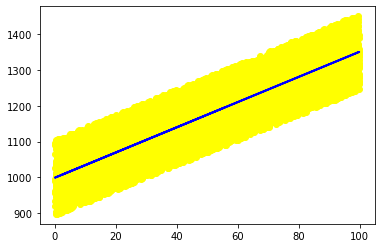

In [191]:
plt.scatter(train_x1, train_t1,  color='yellow')
plt.plot(test_x1, prediction_t1, color='blue', linewidth=2)
plt.show()

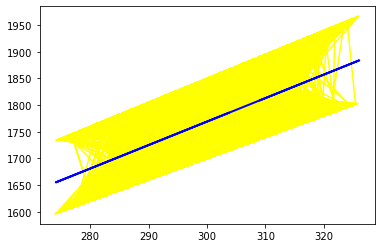

In [192]:
plt.plot(train_x2, train_t2,  color='yellow')
plt.plot(test_x2, prediction_t2, color='blue', linewidth=2)
plt.show()

In [190]:
correlation_1 = np.corrcoef(clear_data.x1, clear_data.t1)
correlation_2 = np.corrcoef(clear_data.x2, clear_data.t1)
correlation_3 = np.corrcoef(clear_data.x3, clear_data.t1)
correlation_4 = np.corrcoef(clear_data.x1, clear_data.t2)
correlation_5 = np.corrcoef(clear_data.x2, clear_data.t2)
correlation_6 = np.corrcoef(clear_data.x3, clear_data.t2)

print('{} - correlation between x1 and t1\n{} - correlation between x2 and t1\n\
{} - correlation between x3 and t1\n{} - correlation between x1 and t2\n\
{} - correlation between x2 and t2\n{} - correlation between x3 and t2'.format\
      (round(correlation_1[0, 1], 5), round(correlation_2[0, 1], 5), round(correlation_3[0, 1], 5),\
       round(correlation_4[0, 1], 5), round(correlation_5[0, 1], 5), round(correlation_6[0, 1], 5)))

0.86028 - correlation between x1 and t1
0.00056 - correlation between x2 and t1
0.01588 - correlation between x3 and t1
-0.02799 - correlation between x1 and t2
0.48749 - correlation between x2 and t2
0.00709 - correlation between x3 and t2
